### Clustering using scikit-learn (with pandas and matplotlib)

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster

In [2]:
# For compatibility across multiple platforms
import os
IB = os.environ.get('INSTABASE_URI',None) is not None
open = ib.open if IB else open

In [3]:
# Read Cities.csv into dataframe
f = open('Cities.csv','rU')
cities = pd.read_csv(f)

C:\Users\Raul\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 'U' mode is deprecated
  


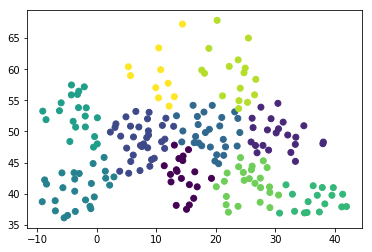

In [8]:
# K-means clustering based on longitude-latitude
kmeans = cluster.KMeans(10)
kmeans.fit(cities[['longitude', 'latitude']])
labels = kmeans.labels_
plt.scatter(cities['longitude'], cities['latitude'], c=labels)
plt.show()
# Try different values for K

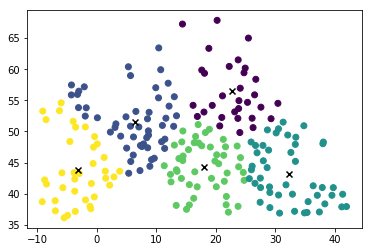

In [9]:
# Now with centroids
kmeans = cluster.KMeans(5)
kmeans.fit(cities[['longitude', 'latitude']])
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(cities['longitude'], cities['latitude'], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='black')
plt.show()

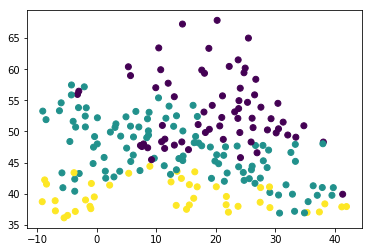

[[  5.82090909]
 [  9.60320755]
 [ 15.14439024]]


In [7]:
# K-means clustering based on temperature
kmeans = cluster.KMeans(3)
kmeans.fit(cities[['temperature']])
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(cities['longitude'], cities['latitude'], c=labels)
plt.show()
print (centroids)

### <font color="green">Your Turn: Clustering on World Cup Data</font>

In [3]:
# Read Players.csv into dataframe
f = open('Players.csv','rU')
players = pd.read_csv(f)

<ipython-input-3-b595cc9dc9eb>:2: DeprecationWarning: 'U' mode is deprecated
  f = open('Players.csv','rU')


In [4]:
# Create a clustering from the Players data and show it
# visually in a scatterplot. No need for centroids.

In [3]:
df = pd.read_csv('C:/Users/Admin/Downloads/Players.csv')

In [4]:
df

,surname,team,position,minutes,shots,passes,tackles,saves
0,Abdoun,Algeria,midfielder,16,0,6,0,0
1,Belhadj,Algeria,defender,270,1,146,8,0
2,Boudebouz,Algeria,midfielder,74,3,28,1,0
3,Bougherra,Algeria,defender,270,1,89,11,0
4,Chaouchi,Algeria,goalkeeper,90,0,17,0,2
...,...,...,...,...,...,...,...,...
590,Holden,USA,midfielder,4,0,2,0,0
591,Howard,USA,goalkeeper,390,0,81,0,14
592,Jozy Altidore,USA,forward,356,8,84,2,0
593,Onyewu,USA,defender,170,1,69,2,0


In [5]:
df.describe()

,minutes,shots,passes,tackles,saves
count,595.000000,595.000000,595.000000,595.000000,595.000000
mean,208.863866,2.304202,84.521008,4.191597,0.667227
std,145.433556,3.347430,77.310368,4.654052,2.955936
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,88.000000,0.000000,29.000000,1.000000,0.000000
50%,191.000000,1.000000,61.000000,3.000000,0.000000
75%,270.000000,3.000000,115.500000,6.000000,0.000000
max,570.000000,27.000000,563.000000,34.000000,20.000000


In [6]:
positions = pd.DataFrame(df['position'].unique())
positions

,0
0,midfielder
1,defender
2,goalkeeper
3,forward


# Objectives:

1. Cluster positions in the world cup data based on their essential metrics.
2. Usually pair stats with completed pass since passes are a great indicator of tempo control, teamwork, and assists. 

## Forwards

Forwards are the primary scorers for the team. Able to score through traffic and also able to assist scores for other teammates.

Essential Metrics: Shots and Passes

In [7]:
forwards = df[df.position == "forward"]
forwards.head()

,surname,team,position,minutes,shots,passes,tackles,saves
5,Djebbour,Algeria,forward,123,3,19,1,0
6,Ghezzal,Algeria,forward,40,3,8,0,0
14,Saifi,Algeria,forward,15,1,3,0,0
18,Aguero,Argentina,forward,106,2,57,2,0
25,Higuain,Argentina,forward,341,13,93,5,0


In [11]:
forwards['shot_per_minute'], forwards['pass_per_minute'] = forwards['shots']/forwards['minutes'], forwards['passes']/forwards['minutes']

<ipython-input-11-4fea8dd54049>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forwards['shot_per_minute'], forwards['pass_per_minute'] = forwards['shots']/forwards['minutes'], forwards['passes']/forwards['minutes']


In [12]:
forwards.head()

,surname,team,position,minutes,shots,passes,tackles,saves,shot_per_minute,pass_per_minute
5,Djebbour,Algeria,forward,123,3,19,1,0,0.024390,0.154472
6,Ghezzal,Algeria,forward,40,3,8,0,0,0.075000,0.200000
14,Saifi,Algeria,forward,15,1,3,0,0,0.066667,0.200000
18,Aguero,Argentina,forward,106,2,57,2,0,0.018868,0.537736
25,Higuain,Argentina,forward,341,13,93,5,0,0.038123,0.272727


#### Forwards clustered using pass per minute and shot per minute

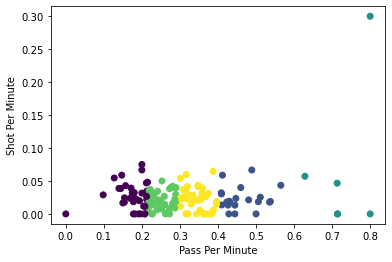

In [18]:
kmeans = cluster.KMeans(5)
kmeans.fit(forwards[['pass_per_minute', 'shot_per_minute']])
labels = kmeans.labels_
plt.scatter(forwards['pass_per_minute'], forwards['shot_per_minute'], c=labels)
plt.xlabel("Pass Per Minute")
plt.ylabel("Shot Per Minute")
plt.show()

In [14]:
fwds_no_outlier = forwards[forwards.shot_per_minute < 0.25]

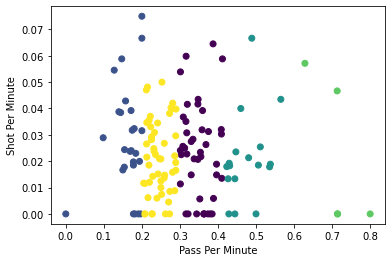

In [15]:
#Without the single outlier
kmeans = cluster.KMeans(5)
kmeans.fit(fwds_no_outlier[['shot_per_minute', 'pass_per_minute']])
labels = kmeans.labels_
plt.scatter(fwds_no_outlier['pass_per_minute'], fwds_no_outlier['shot_per_minute'], c=labels)
plt.xlabel("Pass Per Minute")
plt.ylabel("Shot Per Minute")
plt.show()

## Goal Keepers

Goal keepers are the last line of defense. Saving the ball from the opponent's goal attempt is the primary role but completing passes for goalkeepers is also crucial since their area is close to the opponent's post and an interception might directly lead to a score.

Essential Metric: Saves and Passes

In [30]:
goalie = df[df.position == 'goalkeeper']
goalie.head()

,surname,team,position,minutes,shots,passes,tackles,saves
4,Chaouchi,Algeria,goalkeeper,90,0,17,0,2
11,M'Bolhi,Algeria,goalkeeper,180,0,30,0,12
34,Romero,Argentina,goalkeeper,450,0,47,0,10
54,Schwarzer,Australia,goalkeeper,270,0,51,0,13
66,Julio Cesar,Brazil,goalkeeper,450,0,69,0,10


In [19]:
goalie['saves_per_minute'], goalie['pass_per_minute'] = goalie['saves']/goalie['minutes'], goalie['passes']/goalie['minutes']

<ipython-input-19-d9312918edae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goalie['saves_per_minute'], goalie['pass_per_minute'] = goalie['saves']/goalie['minutes'], goalie['passes']/goalie['minutes']


#### Goalkeepers clustered based on passes per minutes and saves per minute

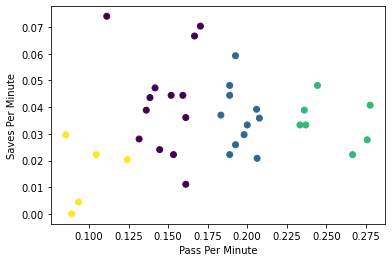

In [21]:
kmeans = cluster.KMeans(4)
kmeans.fit(goalie[['pass_per_minute', 'saves_per_minute']])
labels = kmeans.labels_
plt.scatter(goalie['pass_per_minute'], goalie['saves_per_minute'], c=labels)
plt.xlabel("Pass Per Minute")
plt.ylabel("Saves Per Minute")
plt.show()

## Midfielders

Midfielders are the link between the defense and offense, known for their passes to set up forwards while being expected defend as well.

Essential Metrics: Passes, Shots, and Tackles

In [27]:
mid = df[df.position == 'midfielder']
mid.head()

,surname,team,position,minutes,shots,passes,tackles,saves
0,Abdoun,Algeria,midfielder,16,0,6,0,0
2,Boudebouz,Algeria,midfielder,74,3,28,1,0
7,Guedioura,Algeria,midfielder,38,0,18,1,0
9,Kadir,Algeria,midfielder,262,0,104,3,0
10,Lacen,Algeria,midfielder,270,0,158,8,0


In [42]:
mid['shot_per_minute'], mid['pass_per_minute'], mid['tackle_per_minute'] = mid['shots']/mid['minutes'], mid['passes']/mid['minutes'], mid['tackles']/mid['minutes']

<ipython-input-42-781a13ba4d1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mid['shot_per_minute'], mid['pass_per_minute'], mid['tackle_per_minute'] = mid['shots']/mid['minutes'], mid['passes']/mid['minutes'], mid['tackles']/mid['minutes']


#### Midfielders clustered based on passes per minute and shots per minute

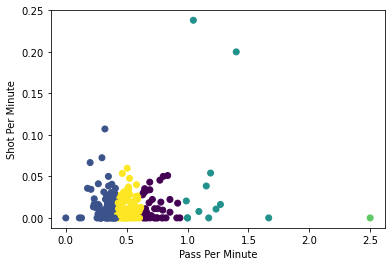

In [43]:
kmeans = cluster.KMeans(5)
kmeans.fit(mid[['pass_per_minute', 'shot_per_minute']])
labels = kmeans.labels_
plt.scatter(mid['pass_per_minute'], mid['shot_per_minute'], c=labels)
plt.xlabel("Pass Per Minute")
plt.ylabel("Shot Per Minute")
plt.show()

#### Midfielders clustered based on passes per minute and tackles per minute

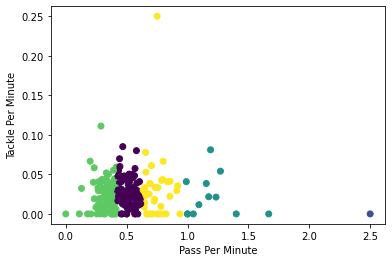

In [44]:
kmeans = cluster.KMeans(5)
kmeans.fit(mid[['pass_per_minute', 'tackle_per_minute']])
labels = kmeans.labels_
plt.scatter(mid['pass_per_minute'], mid['tackle_per_minute'], c=labels)
plt.xlabel("Pass Per Minute")
plt.ylabel("Tackle Per Minute")
plt.show()

#### Midfielders clustered based on shots per minute and tackles per minute

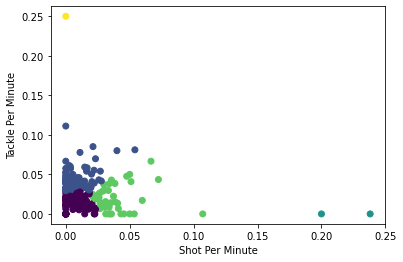

In [45]:
kmeans = cluster.KMeans(5)
kmeans.fit(mid[['shot_per_minute', 'tackle_per_minute']])
labels = kmeans.labels_
plt.scatter(mid['shot_per_minute'], mid['tackle_per_minute'], c=labels)
plt.xlabel("Shot Per Minute")
plt.ylabel("Tackle Per Minute")
plt.show()

## Defenders

Defenders are tasked to prevent the scorers from the opposite team from scoring through tackles and interceptions

Essential Metrics: Passes and Tackles

In [36]:
defenders = df[df.position == "defender"]
defenders.head()

,surname,team,position,minutes,shots,passes,tackles,saves
1,Belhadj,Algeria,defender,270,1,146,8,0
3,Bougherra,Algeria,defender,270,1,89,11,0
8,Halliche,Algeria,defender,270,2,94,4,0
15,Yahia,Algeria,defender,269,1,79,4,0
20,Burdisso,Argentina,defender,341,1,167,1,0


In [37]:
defenders['tackle_per_minute'], defenders['pass_per_minute'] = defenders['tackles']/defenders['minutes'], defenders['passes']/defenders['minutes']

<ipython-input-37-fdfcadb9d65d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defenders['tackle_per_minute'], defenders['pass_per_minute'] = defenders['tackles']/defenders['minutes'], defenders['passes']/defenders['minutes']


#### Defenders clustered based on passes and tackles

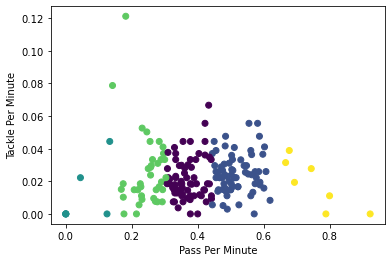

In [40]:
kmeans = cluster.KMeans(5)
kmeans.fit(defenders[['pass_per_minute', 'tackle_per_minute']])
labels = kmeans.labels_
plt.scatter(defenders['pass_per_minute'], defenders['tackle_per_minute'], c=labels)
plt.xlabel("Pass Per Minute")
plt.ylabel("Tackle Per Minute")
plt.show()